In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib import cm
from matplotlib import colors
import mplhep as hep
from coffea.util import load
from coffea import hist
from coffea.hist import plot
import os
import numpy as np

In [2]:
#output = load("/work/mmarcheg/ttHbb/histograms/hists_dilepton_baseline_samples_t3local_2017_solvedmask.coffea")
output = load("/work/mmarcheg/ttHbb/histograms/hists_dilepton_samples_TTTo2L2Nu_TTToSemiLeptonic_debug.coffea")
output

{'sumw': defaultdict_accumulator(float,
                         {'TTTo2L2Nu': 319689109.7712555,
                          'TTToSemiLeptonic': 239982612.96672282,
                          'ttHTobb': 3610471.734146118}),
 'nevts': defaultdict_accumulator(int,
                         {'TTTo2L2Nu': 4435294,
                          'TTToSemiLeptonic': 798000,
                          'ttHTobb': 6850498}),
 'nevts_solved': defaultdict_accumulator(int,
                         {'TTTo2L2Nu': 3595,
                          'TTToSemiLeptonic': 1,
                          'ttHTobb': 4319}),
 'hist_muons_pt_basic_weights_ones': <Hist (dataset,values) instance at 0x7fa94c5ce510>,
 'hist_muons_eta_basic_weights_ones': <Hist (dataset,values) instance at 0x7fa94c5cec10>,
 'hist_goodmuons_pt_basic_weights_ones': <Hist (dataset,values) instance at 0x7fa94c5cee50>,
 'hist_goodmuons_eta_basic_weights_ones': <Hist (dataset,values) instance at 0x7fa94c5d6110>,
 'hist_electrons_pt_basic_weights_ones

In [3]:
histo = output['hist_leadAK8JetMass_basic_weights_ones']
keys = []
for item in histo.values().keys():
    keys.append(item[0])
    print(item[0])

TTTo2L2Nu
TTToSemiLeptonic
ttHTobb


In [4]:
masks = ['basic','boost','2l2b','2l2bsolved','2l2bnotsolved','2l2blowdr','2l2bHbb',
         '2l2bmw','2l2bHbbmw','2l2bmwmt','2l2bHbbmwmt','2l2blowmt','2l2bhighmt']
weights = ['ones', 'nominal']

plt.style.use(hep.style.ROOT)

def get_keys(histo):
    
    keys = []
    for item in histo.values().keys():
        keys.append(item[0])
        
    return keys

def significance(histo, mass_range, signal='ttHTobb'):
    
    datasets = get_keys(histo)
    histo_sr = histo.rebin("values", hist.Bin("values", "var", np.arange(mass_range[0],mass_range[1],1)))
    
    S = 0
    B = 0
    
    for dataset in datasets:
        if dataset == signal:
            S += sum(list(histo_sr[dataset].values().items())[0][-1])
            #print("S =", S)
        else:
            B += sum(list(histo_sr[dataset].values().items())[0][-1])
            #print("B =", B)
    
    return S/np.sqrt(S+B)

In [5]:
significance(output['hist_leadAK8JetMass_basic_weights_nominal'], [70,200])

0.5966016060486283

In [6]:
sig = {}
for wn in weights:
    if wn == 'ones': continue
    d = {}
    for mask_name in masks:
        histo = output[f'hist_leadAK8JetMass_{mask_name}_weights_{wn}']
        s = significance(histo, [100,150])
        sig[mask_name] = s
        print(mask_name, "\t", s)

basic 	 0.5619328700807961
boost 	 1.0678525576888245
2l2b 	 0.44802954441352827
2l2bsolved 	 0.38521242441019127
2l2bnotsolved 	 0.22885105625307223
2l2blowdr 	 0.22885105625307223
2l2bHbb 	 1.0358529278198485
2l2bmw 	 0.2566229067387439
2l2bHbbmw 	 0.6157094340664764
2l2bmwmt 	 0.19274464520368784
2l2bHbbmwmt 	 0.4007544689380417
2l2blowmt 	 0.3155188742496891
2l2bhighmt 	 0.321492149406839


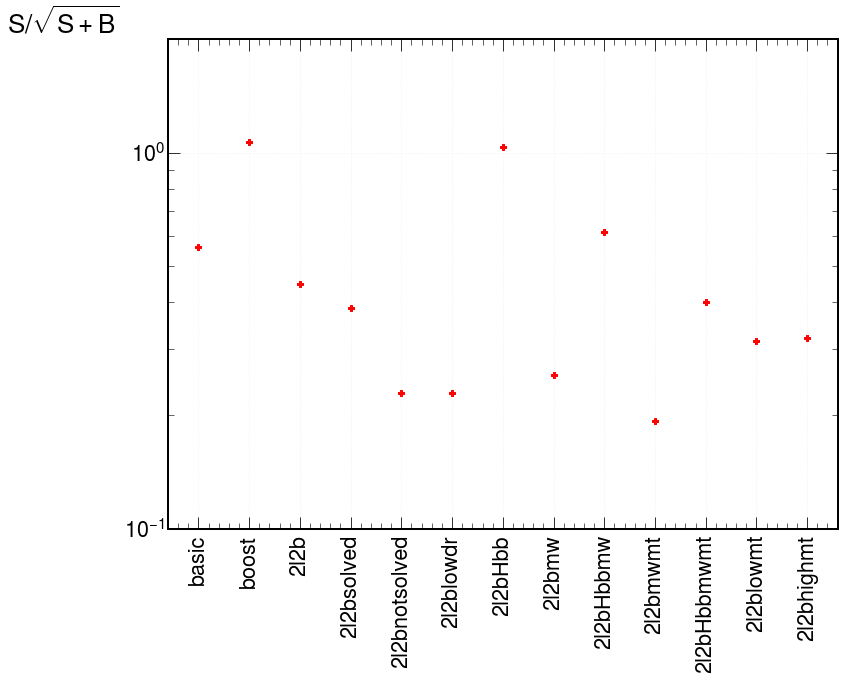

In [9]:
fig = plt.figure(figsize=[12,9])
plt.scatter(sig.keys(), sig.values(), marker="P", color="red")
plt.xticks(rotation='vertical')
plt.ylim(0.1, 2)
plt.ylabel(r"$S/\sqrt{S+B}$", rotation="horizontal")
plt.grid(alpha=0.2)
plt.yscale("log");